# Задание 1

## РАБОТА С БИБЛИОТЕКОЙ PANDAS

**Цель работы:** познакомиться с использованием библиотеки pandas при решении практических задач, связанных с анализом данных.

**Задание:**

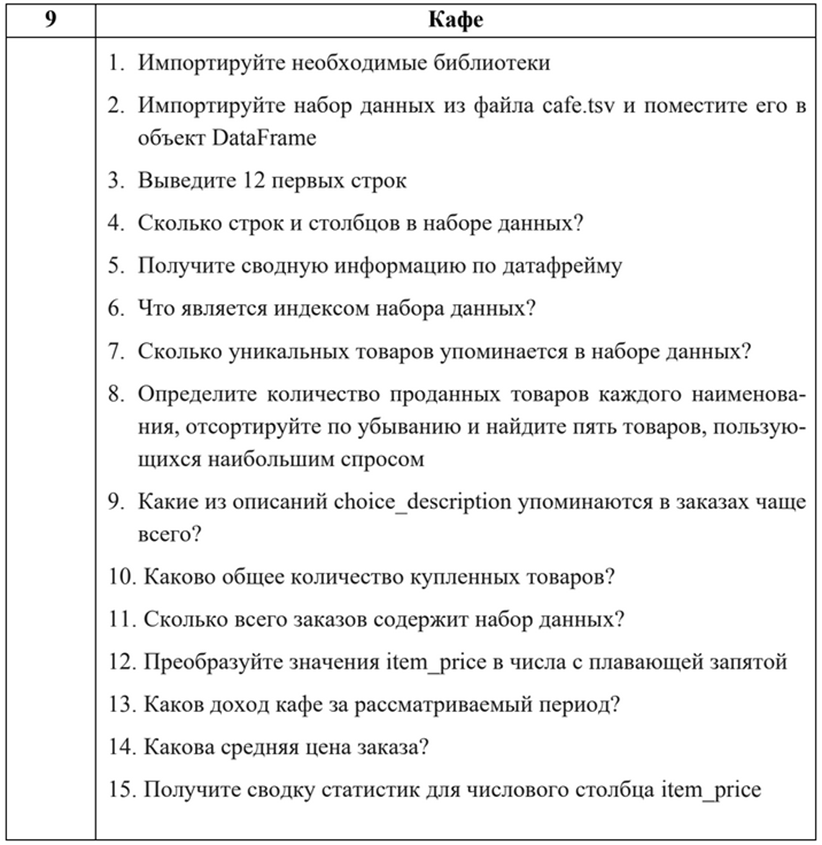

**Описание полей:**

- **order_id** – номер заказа;
- **quantity** – количество;
- **item_name** – имя элемента;
- **choice_description** – описание элемента;
- **item_price** – цена элемента.

## 1. Импортируем необходимые библиотеки

In [9]:
import numpy as np
import pandas as pd

## 2. Импортируем набор данных из файла cafe.tsv поместим его в объект DataFrame

In [13]:
df = pd.read_csv('cafe.tsv', sep='\t')

## 3. Выводим 12 первых строк

In [14]:
print("Первые 12 строк:")
print(df.head(12))

Первые 12 строк:
    order_id  quantity                              item_name  \
0          1         1           Chips and Fresh Tomato Salsa   
1          1         1                                   Izze   
2          1         1                       Nantucket Nectar   
3          1         1  Chips and Tomatillo-Green Chili Salsa   
4          2         2                           Chicken Bowl   
5          3         1                           Chicken Bowl   
6          3         1                          Side of Chips   
7          4         1                          Steak Burrito   
8          4         1                       Steak Soft Tacos   
9          5         1                          Steak Burrito   
10         5         1                    Chips and Guacamole   
11         6         1                   Chicken Crispy Tacos   

                                   choice_description item_price  
0                                                 NaN     $2.39   
1  

## 4. Сколько строк и столбцов в наборе данных?

In [15]:
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")

Количество строк: 4622
Количество столбцов: 5


## 5. Получим сводную информацию по датафрейму

In [16]:
print("Сводная информация:")
print(df.info())

Сводная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


## 6. Что является индексом набора данных?

In [18]:
print(df.index)

RangeIndex(start=0, stop=4622, step=1)


## 7. Сколько уникальных товаров упоминается в наборе данных?

In [19]:
unique_items = df['item_name'].nunique()
print(f"Количество уникальных товаров: {unique_items}")

Количество уникальных товаров: 50


## 8. Определяем количество проданных товаров каждого наименования, отсортируем по убыванию и найдем пять товаров, пользующихся наибольшим спросом

In [20]:
# Количество проданных товаров по наименованию
item_counts = df['item_name'].value_counts()
print("5 самых популярных товаров:")
print(item_counts.head())

5 самых популярных товаров:
item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: count, dtype: int64


## 9. Какие из описаний choice_description упоминаются в заказах чаще всего?

In [21]:
# Убираем пропуски и считаем частоту
top_descriptions = df['choice_description'].dropna().value_counts().head(10)
print("10 самых частых описаний choice_description:")
print(top_descriptions)

10 самых частых описаний choice_description:
choice_description
[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
[Fresh Tomato Salsa (Mild), [Pinto Beans, Rice, Cheese, Sour Cream]]                  36
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]                         33
[Lemonade]                                                                            33
[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream, Lettuce]]                             29
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese]]                                     28
Name: count, dtype: int64


## 10. Каково общее количество купленных товаров?

In [22]:
total_items = df['quantity'].sum()
print(f"Общее количество купленных товаров: {total_items}")

Общее количество купленных товаров: 4972


## 11. Сколько всего заказов содержит набор данных?

In [23]:
total_orders = df['order_id'].nunique()
print(f"Всего заказов: {total_orders}")

Всего заказов: 1834


## 12. Преобразуем значения item_price в числа с плавающей запятой

In [24]:
# Убираем знак $ и преобразуем в float
df['item_price'] = df['item_price'].str.replace('$', '').astype(float)
print("Тип данных item_price после преобразования:", df['item_price'].dtype)

Тип данных item_price после преобразования: float64


## 13. Каков доход кафе за рассматриваемый период?

In [25]:
# Выручка = цена × количество
df['revenue'] = df['item_price'] * df['quantity']
total_revenue = df['revenue'].sum()
print(f"Общий доход: ${total_revenue:.2f}")

Общий доход: $39237.02


## 14. Какова средняя цена заказа?

In [26]:
# Сначала считаем выручку по каждому заказу
order_revenue = df.groupby('order_id')['revenue'].sum()
average_order_price = order_revenue.mean()
print(f"Средняя цена заказа: ${average_order_price:.2f}")

Средняя цена заказа: $21.39


## 15. Получим сводку статистик для числового столбца item_price

In [27]:
print("Статистики по цене товара:")
print(df['item_price'].describe())

Статистики по цене товара:
count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64
